In [23]:
%matplotlib inline
from itertools import permutations, combinations
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from itertools import count
import numpy
import pandas as pd

with open("sampleNames.txt") as file:
    lines = file.read()
    lines = lines.split('\n')

In [24]:
def countVowels(*words):
    vowels = ['a', 'o', 'u', 'i', 'e', 'A', 'O', 'U', 'I', 'E']
    summation = 0
    for word in words:
        for letter in word:
            if letter in vowels:
                summation+=1
                if letter.isupper():
                    vowels.pop(vowels.index(letter.lower()))
                else:
                    vowels.pop(vowels.index(letter.upper()))
                vowels.pop(vowels.index(letter))

    return summation

In [25]:
lines = lines[0:5]

counting = count()
namevalue = {name : next(counting) for name in lines} #Mapping each name in lines to an int

p = 3 #How many persons to compare
names = list(permutations(lines, p))
plist = []
for i in range(p):
    plist.append( tuple(nametuple[i] for nametuple in names) )

([<matplotlib.axis.XTick at 0x23ad8823d68>,
 <a list of 60 Text yticklabel objects>)

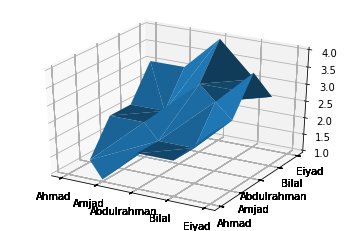

In [26]:
fig, ax =  plt.subplots(subplot_kw={'projection' : '3d'})
pindices = []
for i in range(p): #Getting the plist in terms of mapped values from dict
    pindices.append(tuple(namevalue[name] for name in plist[i]))
    
funcResult = [countVowels(name1, name2) for name1, name2 in zip(plist[0], plist[1])]
ax.plot_trisurf(pindices[0], pindices[1], funcResult)
plt.xticks(pindices[0], plist[0])
plt.yticks(pindices[1], plist[1])
